# Universidad de Buenos Aires
# Aprendizaje Profundo - TP1
# Cohorte 20 - 3er bimestre 2025


Este primer TP comienza la semana de la clase 2 y la ventana de entrega estará abierta hasta las **23hs del jueves 31 de julio (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

ESTE TP1 EQUIVALE AL 60% DE SU NOTA FINAL.

El formato de entrega debe ser un link a un notebook de google colab. Permitir acceso a gvilcamiza.ext@fi.uba.ar y **habilitar los comentarios, para poder darles el feedback**. Si no lo hacen así no se podrá dar el feedback respectivo por cada pregunta.

El envío **se realizará en el siguiente link de google forms: [link](https://forms.gle/2UKBgNLjBZZ5XCeH9)**. Tanto los resultados, gráficas, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

**NO SE VALIDARÁN ENVÍOS POR CORREO, EL MÉTODO DE ENTREGA ES SOLO POR EL FORMS.**

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP1.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP1-Co20.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código, los gráficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.
- Solo se revisarán los trabajos que hayan sido enviados por el forms.

# **PREGUNTA 1**

## **Comparación de Gradiente Descendente y Adam en una Función de Costo No Convexa**

En este ejercicio se compararán los optimizadores Gradiente Descendente (GD) y Adam en la minimización de una función de costo basada en una red neuronal de una sola neurona:
$$
z = w x + b
$$
Con función de activación tangente hiperbólica:

$$
\hat{y} = \tanh(z) = \tanh(w x + b)
$$

\\

Se analizará la trayectoria de aprendizaje de ambos algoritmos y se evaluará su eficiencia con diferentes tasas de aprendizaje (learning rate).

\\

La función de costo utilizada es el Error Cuadrático Medio (MSE):

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$$

$$
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} ( \tanh(w x_i + b) - y_i )^2
$$

donde \\( w \\) y \\( b \\) son los parámetros a optimizar.

\\

Si bien es cierto, en estos experimentos estamos comparando optimizadores (GD vs Adam), y no entrenando un modelo como tal, de igual forma se necesitará una especie de dataset. Este será sintético y solo de prueba, por ende tendrán cierta libertad para elegir sus valores. Sin embargo deberán tomar en cuenta que cumpla la siguiente estructura:

`x = np.linspace(ini, fin, n)`

donde `x` es un array de una sola dimensión y con `n` cantidad de valores. Y tiene un rango de valores desde `ini` hasta `fin`. Recomiendo que sea simétrico, es decir, los mismos valores solo que con el signo cambiado, por ejemplo `ini=-3, fin=3`.

\\

Y con un target `y`:

`y = funcion_no_lineal(x) + ruido`

donde `y` es también un vector de una sola dimensión de tamaño `n` que sigue un patrón no lineal con respecto a `x` adicionando un ruido que puede ser creado con algunas de las funciones del paquete `np.random`.


### 1a) Implementación del Gradiente Descendente (1 punto)
- Implementar el algoritmo del Gradiente Descendente (GD) para minimizar \\( J(w, b) \\).
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Inicializar valores de \\( w \\) y \\( b \\) de manera aleatoria con `np.random.randn()` para cada learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época

\\

El optimizador del Gradiente Descendente se debe implementar haciendo el código desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# Genero el array x
n = 100
x = np.linspace(-3, 3, n)
x.shape

(100,)

In [178]:
# Genero el vector y
np.random.seed(42)
y = np.tanh(x) + 0.1 * np.random.randn(n)
y.shape

(100,)

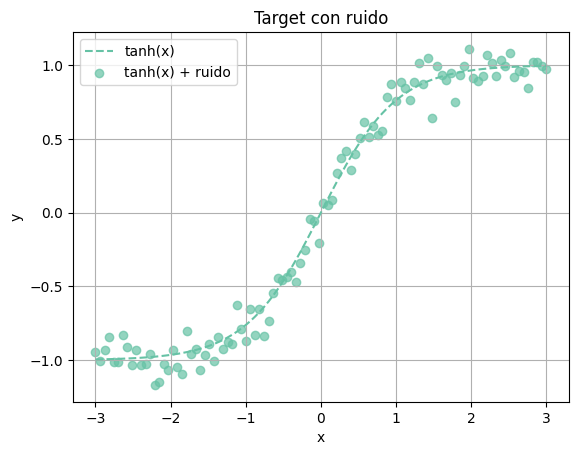

In [179]:
# Visualizo la función con ruido
plt.plot(x, np.tanh(x), label="tanh(x)", linestyle="--")
plt.scatter(x, y, label="tanh(x) + ruido", alpha=0.7)
plt.title("Target con ruido")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

In [180]:
# Inicializo los pesos (w) y bias (b)
np.random.seed(42)  # Para que sea reproducible
w0 = np.random.randn()
b0 = np.random.randn()
print(f"w0 = {w0:.4f}, b0 = {b0:.4f}")

w0 = 0.4967, b0 = -0.1383


In [181]:
# Defino función de costo (MSE) y su derivada
# Función de pérdida: Error Cuadrático Medio (MSE)
def cost(y_hat, y):
    return np.mean((y_hat - y) ** 2)

# Derivada de la pérdida respecto a la salida estimada
def cost_der(y_hat, y):
    return 2 * (y_hat - y) / y.size

In [182]:
# Activación y su derivada (tanh)
def activation(z):
    return np.tanh(z)

def activation_der(z):
    return 1 - np.tanh(z)**2

In [183]:
def gradiente_descendente(x, y, lr, epochs, w0, b0):
    w = w0
    b = b0

    # Listas para guardar valores por época
    lista_w = []
    lista_b = []
    history = []

    for epoch in range(epochs):
        # Forward pass
        z = w * x + b
        y_hat = activation(z)
        loss_val = cost(y_hat, y)
        history.append(loss_val)

        # Derivadas
        dJ_dyhat = cost_der(y_hat, y)
        dyhat_dz = activation_der(z)
        dz_dw = x
        dz_db = 1

        # Regla de la cadena: ∂J/∂w y ∂J/∂b
        dJ_dw = np.sum(dJ_dyhat * dyhat_dz * dz_dw) / x.size
        dJ_db = np.sum(dJ_dyhat * dyhat_dz * dz_db) / x.size

        # Actualización de parámetros
        w -= lr * dJ_dw
        b -= lr * dJ_db

        # Guardar los valores de w y b
        lista_w.append(w)
        lista_b.append(b)

    return history, lista_w, lista_b


In [184]:
# Parámetros de entrenamiento
epochs = 100
learning_rates = [0.1, 0.01, 0.001]

results_GD = {}
lista_w_GD = {}
lista_b_GD = {}

# Entrenamiento con diferentes tasas de aprendizaje
for lr in learning_rates:
    results_GD[lr], lista_w_GD[lr], lista_b_GD[lr] = gradiente_descendente(x, y, lr, epochs, w0, b0)

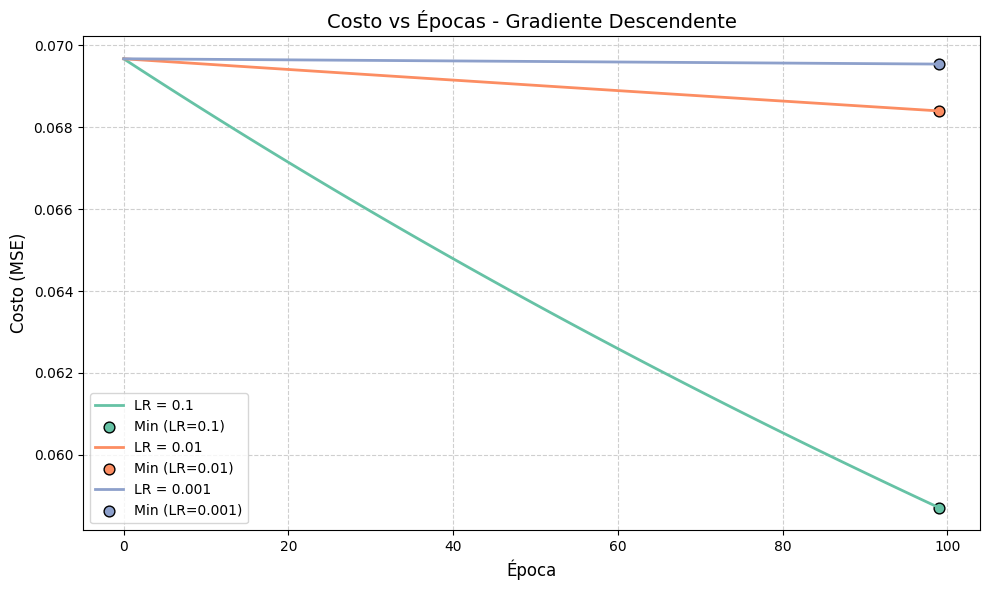

In [185]:
# Configuración estética
sns.set_palette("Set2")
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    losses = results_GD[lr]
    plt.plot(losses, label=f"LR = {lr}", linewidth=2)

    # Marcar mínimo
    min_loss = min(losses)
    min_epoch = losses.index(min_loss)
    plt.scatter(min_epoch, min_loss, s=60, marker="o", edgecolor="black", label=f"Min (LR={lr})")

plt.xlabel('Época', fontsize=12)
plt.ylabel('Costo (MSE)', fontsize=12)
plt.title('Costo vs Épocas - Gradiente Descendente', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

#### Conclusión del gráfico "Costo vs Épocas - Gradiente Descendente"

- El **learning rate 0.1** muestra la mejor convergencia: reduce el costo rápidamente y alcanza el menor error.
- El **learning rate 0.01** también disminuye el error, pero de forma más lenta y con menor eficiencia.
- El **learning rate 0.001** presenta una convergencia muy lenta, prácticamente sin reducción significativa del error en 100 épocas.

En este caso, `0.1` es el valor óptimo entre los probados para lograr una buena velocidad de aprendizaje sin inestabilidad.

### 1b) Implementación de Adam (1 punto)  
- Implementar el algoritmo de Adam para minimizar \\( J(w, b) \\).  
- Utilizar 100 épocas y 3 diferentes learning rates `(0.1, 0.01, 0.001)`.
- Utilizar los mismos valores de \\( w \\) y \\( b \\) que se usaron para GD para cada diferente learning rate.
- Graficar la función de Costo \\( J(w, b) \\) VS número de época
- Hacer 2 modelos, uno sin mini-batch (full-batch) y otro con mini-batch (batch size a elección de ustedes).

\\

Al igual que para GD, el optimizador Adam también se debe implementar desde cero y paso a paso. Se pueden usar librerías como `numpy`, `scipy`, `matplotlib` o similares. Pero no está permitido usar Pytorch ni TensorFlow o frameworks que ya contengan el optimizador desarrollado.

In [186]:
def optimizador_adam(x, y, lr, epochs, w0, b0, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w = w0
    b = b0

    lista_w = []
    lista_b = []
    history = []

    # Inicializar momentos
    mw, vw = 0, 0  # momentos para w
    mb, vb = 0, 0  # momentos para b

    for t in range(1, epochs + 1):
        # Forward pass
        z = w * x + b
        y_hat = activation(z)
        loss_val = cost(y_hat, y)
        history.append(loss_val)

        # Derivadas
        dJ_dyhat = cost_der(y_hat, y)
        dyhat_dz = activation_der(z)
        dz_dw = x
        dz_db = 1

        # Gradientes promedio (batch gradient)
        dJ_dw = np.sum(dJ_dyhat * dyhat_dz * dz_dw) / x.size
        dJ_db = np.sum(dJ_dyhat * dyhat_dz * dz_db) / x.size

        # Momentos para w
        mw = beta1 * mw + (1 - beta1) * dJ_dw
        vw = beta2 * vw + (1 - beta2) * (dJ_dw ** 2)
        mw_hat = mw / (1 - beta1 ** t)
        vw_hat = vw / (1 - beta2 ** t)

        # Momentos para b
        mb = beta1 * mb + (1 - beta1) * dJ_db
        vb = beta2 * vb + (1 - beta2) * (dJ_db ** 2)
        mb_hat = mb / (1 - beta1 ** t)
        vb_hat = vb / (1 - beta2 ** t)

        # Actualización de parámetros
        w -= lr * mw_hat / (np.sqrt(vw_hat) + epsilon)
        b -= lr * mb_hat / (np.sqrt(vb_hat) + epsilon)

        # Guardar trayectoria
        lista_w.append(w)
        lista_b.append(b)

    return history, lista_w, lista_b

In [187]:
# Inicialización de parámetros
np.random.seed(42)
w0 = np.random.randn()
b0 = np.random.randn()

# Hiperparámetros
epochs = 100
learning_rates = [0.1, 0.01, 0.001]

# Resultados
adam_results = {}
lista_w_adam = {}
lista_b_adam = {}

# Entrenamiento con Adam para cada tasa de aprendizaje
for lr in learning_rates:
    adam_results[lr], lista_w_adam[lr], lista_b_adam[lr] = optimizador_adam(x, y, lr, epochs, w0, b0)

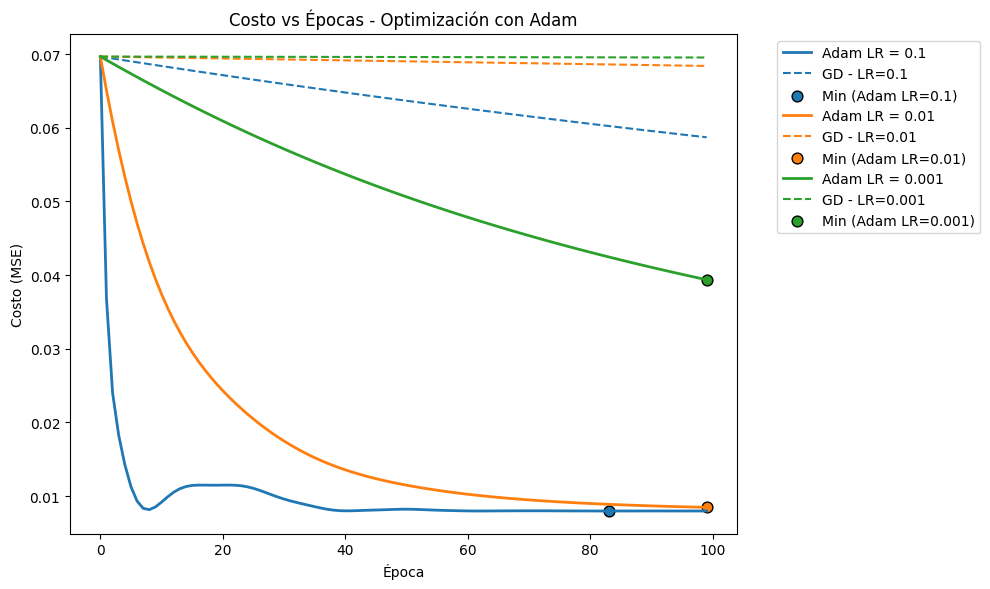

In [188]:
# Gráfico del costo vs épocas

colors = ['tab:blue', 'tab:orange', 'tab:green']
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    loss = adam_results[lr]
    plt.plot(loss, label=f"Adam LR = {lr}", linewidth=2, color=colors[i])
    
    # Marcar mínimo
    min_loss = min(loss)
    min_epoch = loss.index(min_loss)
    plt.plot(results_GD[lr], linestyle='--', label=f'GD - LR={lr}', color=colors[i])
    plt.scatter(min_epoch, min_loss, s=60, marker="o", edgecolor="black", label=f"Min (Adam LR={lr})", color=colors[i])

plt.xlabel('Época')
plt.ylabel('Costo (MSE)')
plt.title('Costo vs Épocas - Optimización con Adam')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.tight_layout()
plt.show()

**Comparación de Adam vs GD:**

Los resultados muestran que Adam alcanza un costo menor que Gradiente Descendente (GD) en las 100 épocas para los tres valores de learning rate evaluados (0.1, 0.01 y 0.001). Adam converge más rápidamente y de forma más eficiente, especialmente con tasas de aprendizaje elevadas, aunque presenta oscilaciones iniciales debido a su comportamiento adaptativo. En contraste, GD muestra una convergencia más lenta y dependiente del valor de LR. Esto evidencia la ventaja de usar Adam como optimizador para este tipo de problemas.

**Resultados esperados y observados:**

| **LR**   | **GD (clásico)**                | **Adam (avanzado)**                          | **¿Es lógico?**               |
|---------|----------------------------------|----------------------------------------------|--------------------------------------|
| 0.1     | Converge lento, lineal           | Baja rápido, tiene oscilaciones iniciales    | Sí, Adam usa momentum              |
| 0.01    | Baja más lento aún               | Muy buen rendimiento, converge más rápido    | Adam supera a GD                   |
| 0.001   | Casi sin convergencia visible    | Mejor que GD, aunque lentamente              | Adam aún mejora a GD               |

### 1c) Comparativa de optimizadores (0.5 puntos)  
- Comparar el resultado y rendimiento de GD VS Adam (full-batch) VS Adam (mini-batch) para cada uno de los learning rates.
- Redactar conclusiones analíticas que resalten las diferencias entre cada optimizador.

In [189]:
# Función de optimización Adam con minibatch
def adam_minibatch(x, y, lr, epochs, w0, b0, batch_size=16, beta1=0.9, beta2=0.999, epsilon=1e-8):
    w = w0
    b = b0
    n = len(x)

    mw, vw = 0, 0
    mb, vb = 0, 0

    history = []
    lista_w = []
    lista_b = []

    t = 0  # contador de actualizaciones (no de épocas)

    for epoch in range(epochs):
        indices = np.random.permutation(n)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for i in range(0, n, batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            z = w * x_batch + b
            y_hat = activation(z)
            loss_val = cost(y_hat, y_batch)

            dJ_dyhat = cost_der(y_hat, y_batch)
            dyhat_dz = activation_der(z)
            dz_dw = x_batch
            dz_db = 1

            dJ_dw = np.sum(dJ_dyhat * dyhat_dz * dz_dw) / x_batch.size
            dJ_db = np.sum(dJ_dyhat * dyhat_dz * dz_db) / x_batch.size

            t += 1  # aquí se incrementa en cada batch

            mw = beta1 * mw + (1 - beta1) * dJ_dw
            vw = beta2 * vw + (1 - beta2) * (dJ_dw ** 2)
            mw_hat = mw / (1 - beta1 ** t)
            vw_hat = vw / (1 - beta2 ** t)

            mb = beta1 * mb + (1 - beta1) * dJ_db
            vb = beta2 * vb + (1 - beta2) * (dJ_db ** 2)
            mb_hat = mb / (1 - beta1 ** t)
            vb_hat = vb / (1 - beta2 ** t)

            w -= lr * mw_hat / (np.sqrt(vw_hat) + epsilon)
            b -= lr * mb_hat / (np.sqrt(vb_hat) + epsilon)

        # Guardar estado al final de cada época
        history.append(loss_val)
        lista_w.append(w)
        lista_b.append(b)

    return history, lista_w, lista_b


In [190]:
# Entrenamiento con Adam full y Adam minibatch
adam_mini_results = {}
lista_w_adam_mini = {}
lista_b_adam_mini = {}

for lr in learning_rates:
    adam_mini_results[lr], lista_w_adam_mini[lr], lista_b_adam_mini[lr] = adam_minibatch(x, y, lr, epochs, w0, b0, batch_size=16)

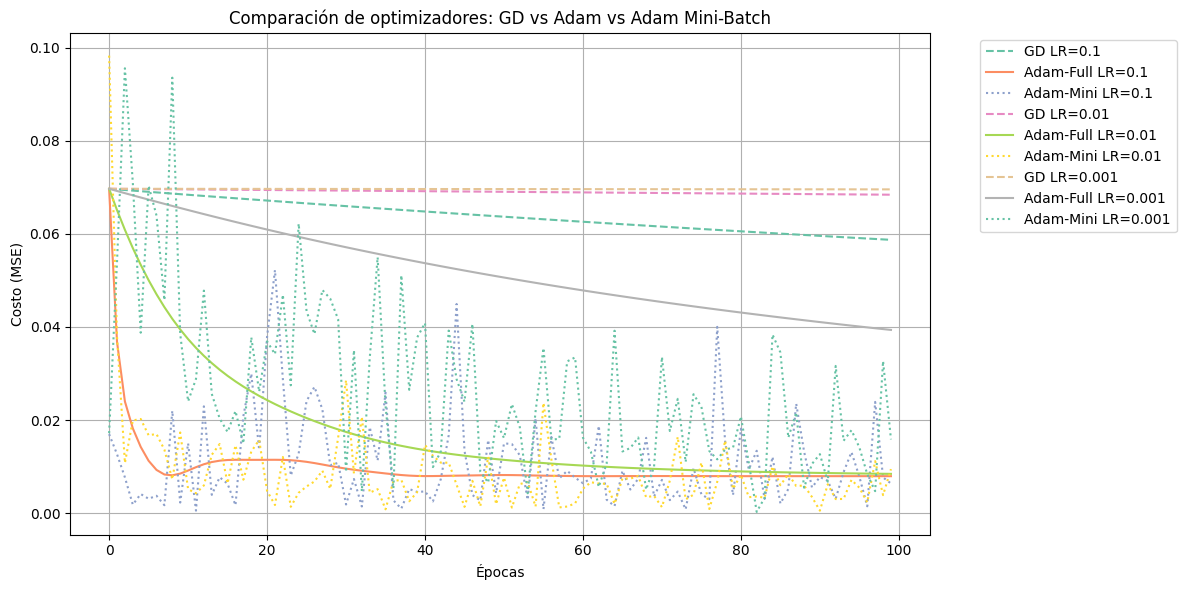

In [191]:
# Gráfico de comparación entre GD, Adam y Adam Mini-Batch
plt.figure(figsize=(12, 6))

for lr in learning_rates:
    plt.plot(results_GD[lr], linestyle='--', label=f"GD LR={lr}")
    plt.plot(adam_results[lr], linestyle='-', label=f"Adam-Full LR={lr}")
    plt.plot(adam_mini_results[lr], linestyle=':', label=f"Adam-Mini LR={lr}")

plt.title("Comparación de optimizadores: GD vs Adam vs Adam Mini-Batch")
plt.xlabel("Épocas")
plt.ylabel("Costo (MSE)")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

### Conclusiones analíticas – Comparación de optimizadores (GD vs Adam vs Adam Mini-Batch)

#### Learning Rate = 0.1
- **GD**: Disminución del costo de manera lenta y lineal.
- **Adam (Full-Batch)**: Convergencia rápida y suave.
- **Adam (Mini-Batch)**: Muestra oscilaciones marcadas, pero alcanza buenos valores de costo.

*Conclusión*: Adam supera ampliamente a GD. Las oscilaciones de Mini-Batch son esperables debido a la variabilidad de los lotes.

---

#### Learning Rate = 0.01
- **GD**: Mejora respecto al caso anterior, pero sigue siendo más lento que Adam.
- **Adam (Full-Batch)**: Excelente rendimiento, con descenso estable y sin oscilaciones.
- **Adam (Mini-Batch)**: Oscilante pero con tendencia a buen mínimo.

*Conclusión*: Este LR es muy adecuado para Adam. El ruido en Mini-Batch no impide una buena convergencia.

---

#### Learning Rate = 0.001
- **GD**: Prácticamente no hay convergencia visible.
- **Adam (Full-Batch)**: Mejor que GD, aunque con convergencia lenta.
- **Adam (Mini-Batch)**: Presenta ruido elevado y baja estabilidad.

*Conclusión*: Adam sigue siendo superior, aunque el LR bajo limita su eficiencia. El ruido relativo en Mini-Batch aumenta.

---

#### Conclusión general
- **Adam (Full-Batch)** es el más eficiente y estable para este problema.
- **Adam (Mini-Batch)** introduce estocasticidad, lo cual puede ser útil en grandes datasets pero genera oscilaciones marcadas en este caso.
- **GD** es consistente pero menos eficiente, especialmente en tasas de aprendizaje menores.

### 1d) Visualización en 3D de la trayectoria de aprendizaje (0.5 puntos)
- Graficar en 3D la trayectoria del aprendizaje de los 3 optimizadores sobre la superficie de la función de costo \\( J(w, b) \\). Se debe elegir un solo learning rate.
- Comparar y redactar cómo se mueven en el espacio de parámetros y qué diferencias existen en la convergencia.
- Recomiendo utilizar `mpl_toolkits.mplot3d` y `np.meshgrid`, pero queda a su criterio la elección de funciones a usar para lograr el gráfico.

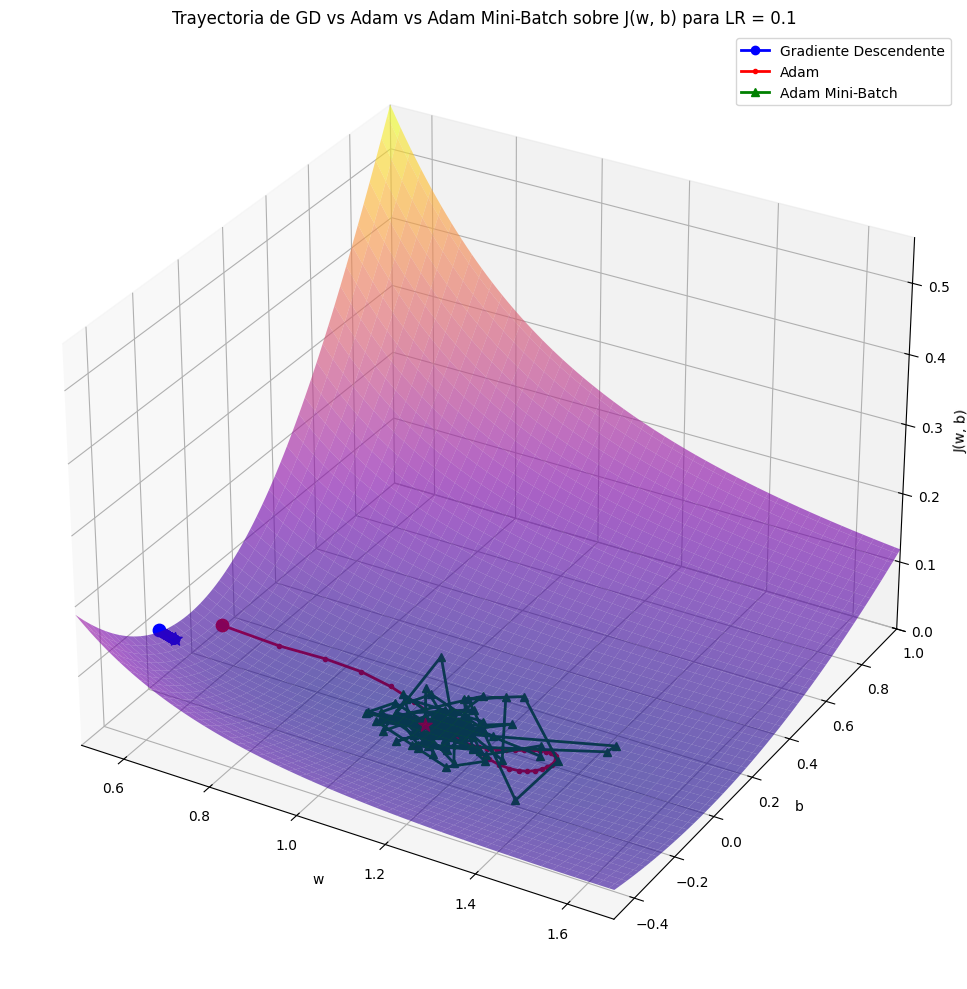

In [192]:
from mpl_toolkits.mplot3d import Axes3D

# Rango de visualización ajustado a trayectorias observadas
w_range = np.linspace(0.5, 1.7, 100)
b_range = np.linspace(-0.5, 1.0, 100)
W, B = np.meshgrid(w_range, b_range)

# Superficie de costo J(w, b)
J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        z = W[i, j] * x + B[i, j]
        y_hat = activation(z)
        J[i, j] = np.mean((y_hat - y)**2)

# Learning rate fijo para comparación
lr = 0.1

# Crear gráfico 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Superficie de costo
ax.plot_surface(W, B, J, cmap='plasma', alpha=0.6, edgecolor='none')

# Trayectorias de optimizadores
ax.plot(lista_w_GD[lr], lista_b_GD[lr], results_GD[lr], color='blue', linewidth=2, marker='o', label='Gradiente Descendente')
ax.plot(lista_w_adam[lr], lista_b_adam[lr], adam_results[lr], color='red', linewidth=2, marker='.', label='Adam')
ax.plot(lista_w_adam_mini[lr], lista_b_adam_mini[lr], adam_mini_results[lr], color='green', linewidth=2, marker='^', label='Adam Mini-Batch')

# Puntos de inicio
ax.scatter(lista_w_GD[lr][0], lista_b_GD[lr][0], results_GD[lr][0], color='blue', s=80, marker='o')
ax.scatter(lista_w_adam[lr][0], lista_b_adam[lr][0], adam_results[lr][0], color='red', s=80, marker='o')
ax.scatter(lista_w_adam_mini[lr][0], lista_b_adam_mini[lr][0], adam_mini_results[lr][0], color='green', s=80, marker='o')

# Puntos de convergencia (fin)
ax.scatter(lista_w_GD[lr][-1], lista_b_GD[lr][-1], results_GD[lr][-1], color='blue', s=100, marker='*')
ax.scatter(lista_w_adam[lr][-1], lista_b_adam[lr][-1], adam_results[lr][-1], color='red', s=100, marker='*')
ax.scatter(lista_w_adam_mini[lr][-1], lista_b_adam_mini[lr][-1], adam_mini_results[lr][-1], color='green', s=100, marker='*')

# Etiquetas y ajustes visuales
ax.set_xlim(0.5, 1.7)
ax.set_ylim(-0.5, 1.0)
ax.set_zlim(0, np.max(J))
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w, b)')
ax.set_title('Trayectoria de GD vs Adam vs Adam Mini-Batch sobre J(w, b) para LR = 0.1')
ax.legend()
plt.tight_layout()
plt.show()


### Comparación de trayectorias para LR = 0.1

En el gráfico anterior, se observa la trayectoria de los algoritmos **Gradiente Descendente (GD)**, **Adam** y **Adam con Mini-Batch** sobre la superficie de la función de costo \( J(w, b) \) para un *learning rate* de 0.1.

- **Adam** converge rápidamente, pero muestra oscilaciones al acercarse al mínimo.
- **GD** sigue un camino más lento pero con una trayectoria suave y directa hacia la convergencia.
- **Adam Mini-Batch** tiene una trayectoria mucho más errática, con saltos desordenados producto de la variabilidad introducida por el muestreo de mini-batches, aunque logra acercarse al mínimo.

Esto refleja cómo la elección del optimizador y la presencia de ruido estocástico pueden afectar la estabilidad del proceso de aprendizaje.

### Ajuste del learning rate

Como se observa, un *learning rate* alto puede acelerar la convergencia pero también introduce inestabilidad, especialmente en métodos como Adam y Adam Mini-Batch. Entonces, decidimos analizar cómo varía el comportamiento de los optimizadores al reducir el *learning rate* a 0.01, buscando una trayectoria más suave y estable que permita comparar mejor la convergencia de cada algoritmo.

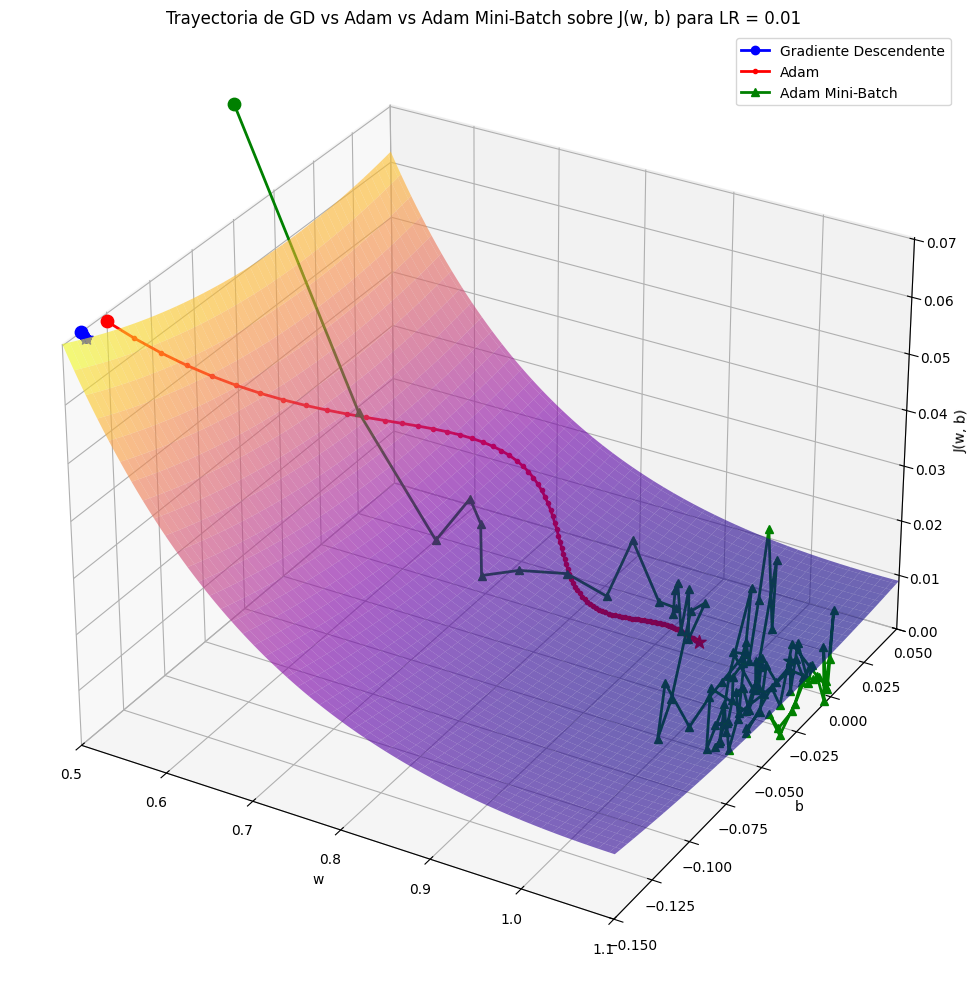

In [193]:
# Rango ajustado a la región de convergencia más acotada
w_range = np.linspace(0.5, 1.1, 100)
b_range = np.linspace(-0.15, 0.05, 100)
W, B = np.meshgrid(w_range, b_range)

# Superficie de costo J(w, b)
J = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        z = W[i, j] * x + B[i, j]
        y_hat = activation(z)
        J[i, j] = np.mean((y_hat - y)**2)

# Learning rate a comparar
lr = 0.01

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Superficie
ax.plot_surface(W, B, J, cmap='plasma', alpha=0.6, edgecolor='none')

# Trayectorias
ax.plot(lista_w_GD[lr], lista_b_GD[lr], results_GD[lr], color='blue', linewidth=2, marker='o', label='Gradiente Descendente')
ax.plot(lista_w_adam[lr], lista_b_adam[lr], adam_results[lr], color='red', linewidth=2, marker='.', label='Adam')
ax.plot(lista_w_adam_mini[lr], lista_b_adam_mini[lr], adam_mini_results[lr], color='green', linewidth=2, marker='^', label='Adam Mini-Batch')

# Puntos de inicio
ax.scatter(lista_w_GD[lr][0], lista_b_GD[lr][0], results_GD[lr][0], color='blue', s=80, marker='o')
ax.scatter(lista_w_adam[lr][0], lista_b_adam[lr][0], adam_results[lr][0], color='red', s=80, marker='o')
ax.scatter(lista_w_adam_mini[lr][0], lista_b_adam_mini[lr][0], adam_mini_results[lr][0], color='green', s=80, marker='o')

# Puntos finales
ax.scatter(lista_w_GD[lr][-1], lista_b_GD[lr][-1], results_GD[lr][-1], color='blue', s=100, marker='*')
ax.scatter(lista_w_adam[lr][-1], lista_b_adam[lr][-1], adam_results[lr][-1], color='red', s=100, marker='*')
ax.scatter(lista_w_adam_mini[lr][-1], lista_b_adam_mini[lr][-1], adam_mini_results[lr][-1], color='green', s=100, marker='*')

# Ejes
ax.set_xlim(0.5, 1.1)
ax.set_ylim(-0.15, 0.05)
ax.set_zlim(0, np.max(J))
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w, b)')
ax.set_title('Trayectoria de GD vs Adam vs Adam Mini-Batch sobre J(w, b) para LR = 0.01')
ax.legend()
plt.tight_layout()
plt.show()


### Comparación 3D de Trayectorias con LR = 0.01

Con un *learning rate* más pequeño, se observan trayectorias más estables en general, aunque persisten diferencias relevantes entre los algoritmos:

- **Gradiente Descendente** mantiene una trayectoria suave y constante, avanzando de forma estable hacia el mínimo, aunque con pasos pequeños que alargan la convergencia.
- **Adam** también muestra una trayectoria estable y rápida, sin oscilaciones significativas, lo que sugiere que la reducción del *learning rate* ayudó a amortiguar las variaciones observadas con LR = 0.1.
- **Adam Mini-Batch**, si bien reduce la magnitud de las oscilaciones en comparación con un *learning rate* alto, continúa mostrando una trayectoria errática debido al muestreo aleatorio de los mini-batches. Sin embargo, logra acercarse al mínimo con menor dispersión que en el caso anterior.

En conclusión, al disminuir el *learning rate* a 0.01, se logra una mayor estabilidad y una convergencia más controlada, en especial para los métodos más sensibles a la variabilidad como Adam Mini-Batch. Aun así, Adam sigue destacándose por su eficiencia, mientras que GD ofrece una convergencia más predecible.

### ¿Por qué Gradiente Descendente tiene una trayectoria rápida al inicio?

En el gráfico 3D puede observarse que el Gradiente Descendente (GD) realiza un cambio abrupto en los primeros pasos, seguido de un avance más pausado y estable. Este comportamiento es esperado y se explica por:

- **Gradientes iniciales grandes**: al comienzo del entrenamiento, los errores de predicción son mayores, lo que genera derivadas parciales (gradientes) más grandes y, por lo tanto, pasos más largos en la actualización de los parámetros.
  
- **Reducción progresiva del gradiente**: a medida que GD se acerca al mínimo de la función de costo, los errores disminuyen y los gradientes se vuelven más pequeños. Esto hace que las actualizaciones sean más suaves, provocando una trayectoria más lenta hacia el final del proceso.

- **Tasa de aprendizaje constante**: como el algoritmo usa un `learning rate` constante (por ejemplo, 0.01), la única forma en que los pasos se reduzcan naturalmente es que el gradiente disminuya, lo cual sucede cerca del mínimo.

Este patrón —avance rápido al inicio y estabilización luego— es característico del comportamiento clásico del Gradiente Descendente cuando se aplica sobre funciones suaves como la MSE.

# **PREGUNTA 2**

Descargar el dataset del siguiente link: https://drive.google.com/file/d/147YyKAiQhJhZV9tHAkrgcTzvRgmwB-OX/view?usp=sharing.

El dataset consiste en compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones, compuestas por un cliente y el producto que adquirió.


### 2a) EDA y preparación del dataset (2.5 puntos)
Realizar el análisis exploratorio del dataset (EDA) con las herramientas vistas en materias anteriores. Pre-procesar y transformar las variables que sean necesarias, analizar qué columnas se deben dropear, cuáles vale la pena hacer un tratamiento de valores nulos, si se debe usar label encoding, one-hot encoding o mapping encoding, explicar los criterios utilizados y analizar las distribuciones.

Vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece a un segmento: "Casual" (gasta menos de 3000), "Gama media" (gasta entre 3000 y 8000), "Gama alta" (gasta entre 8000 y 18000) o a "Premium" (gasta más de 18000), según el producto que adquirió.

Redactar las conclusiones preliminares que pueden notar de las columnas y justificar el porqué de cada encoding aplicado.

**IMPORTANTE: Luego de asignar los segmentos, no se olviden de eliminar la columna "Purchase".**

#### 1. Carga de librerías y dataset

In [194]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Descargar el archivo
url = f"https://drive.google.com/uc?id=147YyKAiQhJhZV9tHAkrgcTzvRgmwB-OX"
gdown.download(url, "dataset_compras.csv", quiet=False)

# Leer el archivo
df_inicial = pd.read_csv("dataset_compras.csv")

Downloading...
From: https://drive.google.com/uc?id=147YyKAiQhJhZV9tHAkrgcTzvRgmwB-OX
To: c:\Users\elipa\CEIA\07-CEIA-APr\CEIA-DeepLearning-TPs\CEIA-DeepLearning-TPs\dataset_compras.csv
100%|██████████| 8.41M/8.41M [00:00<00:00, 17.4MB/s]


#### 2. Revisión inicial del dataset

Objetivo: 
- Entender el tamaño del dataset, tipos de datos, valores nulos, y estadísticos básicos.
- Evaluar columnas irrelevantes o poco informativas.

In [195]:
df_inicial.head(5)

,User_ID,Product_ID,Age,Gender,Marital_Status,City_Category,Stay_In_Current_City_Years,Product_Category,Product_Subcategory_1,Product_Subcategory_2,Purchase
0,1044096,P00017122,46-50,F,1,B,1,10,45.0,NaN,1810
1,1071818,P00074517,36-45,M,0,A,3,11,27.0,NaN,12351
2,1022986,P00013694,36-45,M,1,A,5+,4,28.0,NaN,127
3,1094684,P00049122,36-45,M,1,A,1,16,9.0,8.0,2214
4,1004157,P00006469,46-50,M,1,A,5+,3,NaN,NaN,7142


In [196]:
# Descripción estadística del DataFrame
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182721 entries, 0 to 182720
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     182721 non-null  int64  
 1   Product_ID                  182721 non-null  object 
 2   Age                         182721 non-null  object 
 3   Gender                      182721 non-null  object 
 4   Marital_Status              182721 non-null  int64  
 5   City_Category               182721 non-null  object 
 6   Stay_In_Current_City_Years  182721 non-null  object 
 7   Product_Category            182721 non-null  int64  
 8   Product_Subcategory_1       140903 non-null  float64
 9   Product_Subcategory_2       77461 non-null   float64
 10  Purchase                    182721 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 15.3+ MB


In [197]:
# Descripción estadística del DataFrame
df_inicial.describe()

,User_ID,Marital_Status,Product_Category,Product_Subcategory_1,Product_Subcategory_2,Purchase
count,1.827210e+05,182721.000000,182721.000000,140903.000000,77461.000000,182721.000000
mean,1.050060e+06,0.647567,10.629123,24.557724,12.843483,7851.668971
std,2.884040e+04,0.477729,5.659703,12.550279,4.593955,8321.461408
min,1.000035e+06,0.000000,1.000000,3.000000,5.000000,45.000000
25%,1.024971e+06,0.000000,5.000000,13.000000,9.000000,578.000000
50%,1.050146e+06,1.000000,11.000000,24.000000,13.000000,5060.000000
75%,1.074883e+06,1.000000,16.000000,36.000000,17.000000,11930.000000
max,1.099995e+06,1.000000,20.000000,45.000000,20.000000,29980.000000


#### 3. Detección de valores faltantes o duplicados

In [198]:
# Verificar si hay registros duplicados
print("Cantidad de registros duplicados:", df_inicial.duplicated().sum())

Cantidad de registros duplicados: 2249


In [199]:
# Verificar si hay valores nulos
print("Cantidad de valores nulos por columna:")
df_inicial.isnull().sum()

Cantidad de valores nulos por columna:


User_ID                            0
Product_ID                         0
Age                                0
Gender                             0
Marital_Status                     0
City_Category                      0
Stay_In_Current_City_Years         0
Product_Category                   0
Product_Subcategory_1          41818
Product_Subcategory_2         105260
Purchase                           0
dtype: int64

<Axes: >

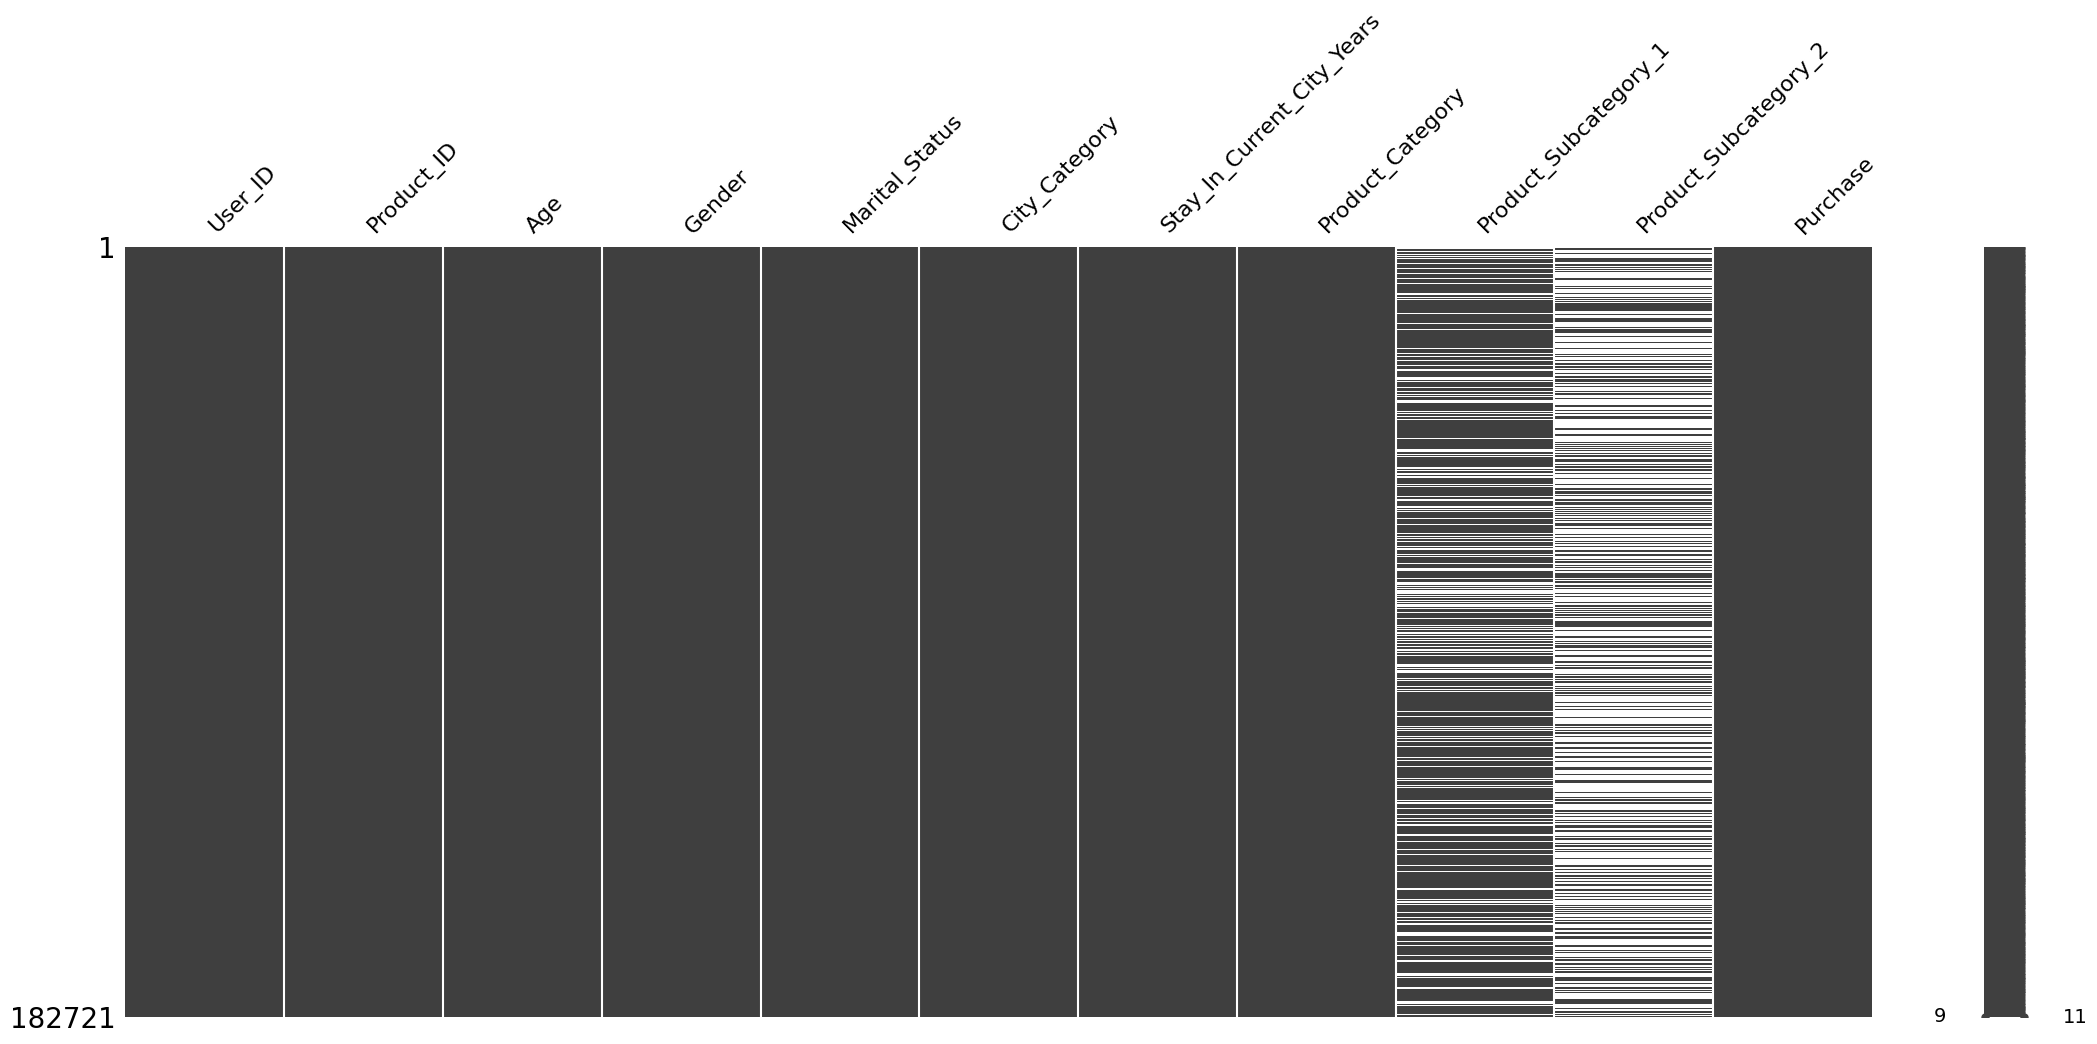

In [200]:
# Visualizar la carencia de datos faltantes
msno.matrix(df_inicial)

In [201]:
# Seleccionar las columnas de tipo 'object'
object_cols = df_inicial.select_dtypes(include='object').columns

# Convertir columnas 'object' a tipo 'category'
for col in object_cols:
    df_inicial[col] = df_inicial[col].astype('category')

# Aplicar encoding a las columnas categóricas para ver la matriz de correlación
df_corr=df_inicial.copy()

for col in object_cols:
    df_corr[col] = df_corr[col].cat.codes

print("\nTipos de datos después de la conversión:")
df_inicial.info()


Tipos de datos después de la conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182721 entries, 0 to 182720
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     182721 non-null  int64   
 1   Product_ID                  182721 non-null  category
 2   Age                         182721 non-null  category
 3   Gender                      182721 non-null  category
 4   Marital_Status              182721 non-null  int64   
 5   City_Category               182721 non-null  category
 6   Stay_In_Current_City_Years  182721 non-null  category
 7   Product_Category            182721 non-null  int64   
 8   Product_Subcategory_1       140903 non-null  float64 
 9   Product_Subcategory_2       77461 non-null   float64 
 10  Purchase                    182721 non-null  int64   
dtypes: category(5), float64(2), int64(4)
memory usage: 9.5 MB


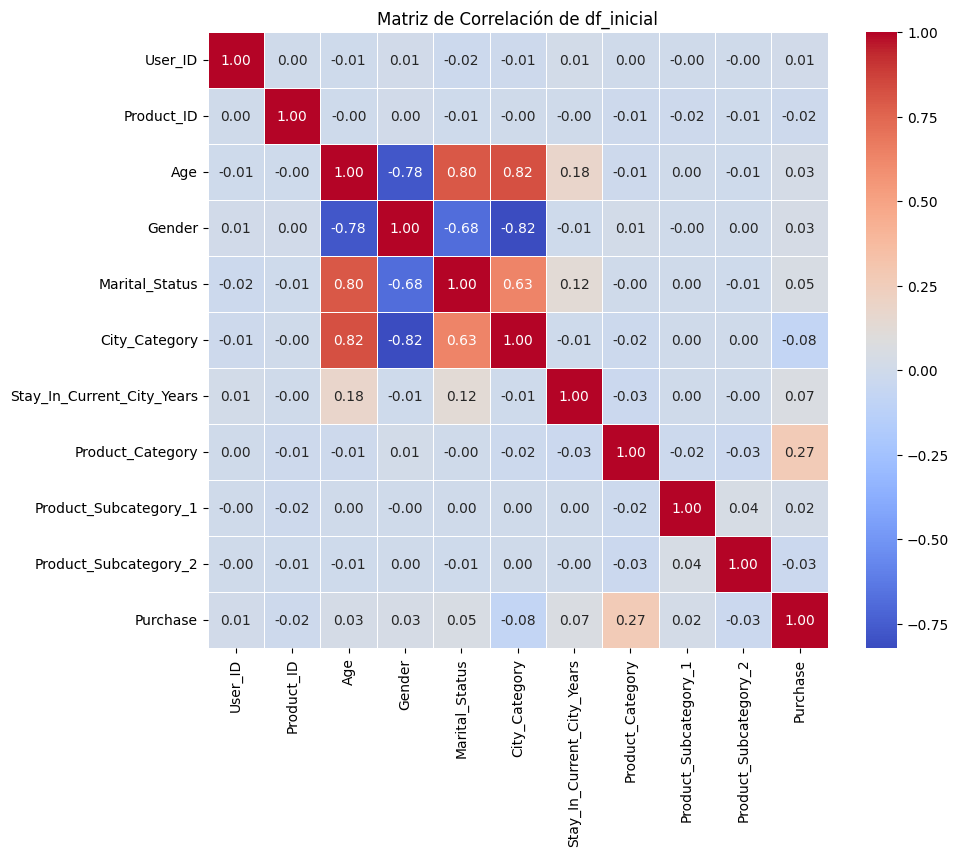

In [202]:
# Matriz de correlación
correlation_matrix = df_corr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de df_inicial')
plt.show()

El análisis de la matriz de correlación reveló algunas relaciones altas entre variables como Age, Marital_Status y City_Category, con coeficientes cercanos a 0.8. No obstante, estas variables describen dimensiones distintas y no dependen directamente entre sí, por lo que se decide conservarlas en el dataset.

#### 4. Análisis univariado (distribución de variables)

Gender
M    98647
F    84074
Name: count, dtype: int64


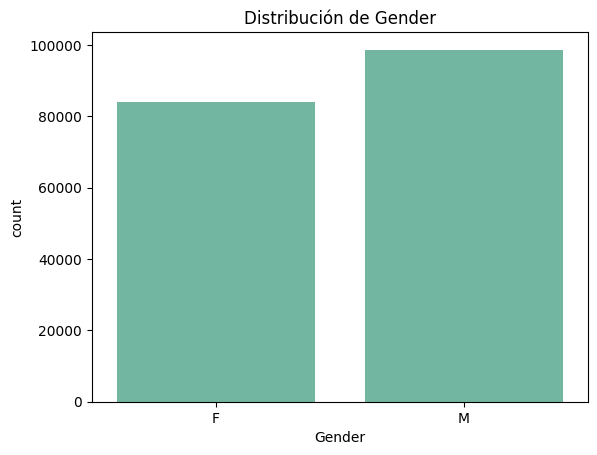

Age
46-50    38173
36-45    34648
26-35    33763
51-55    33012
55+      26139
18-25     8798
0-17      8188
Name: count, dtype: int64


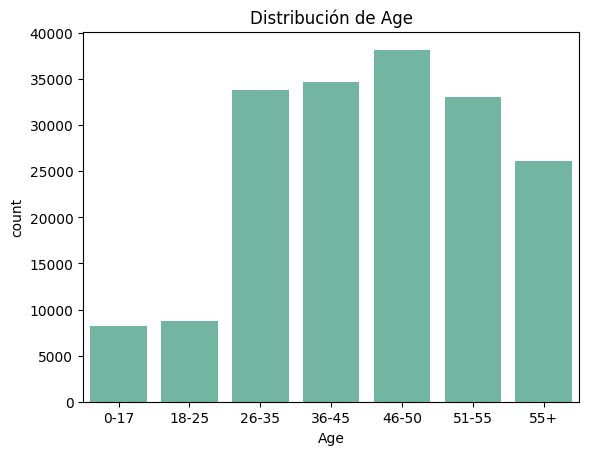

Marital_Status
1    118324
0     64397
Name: count, dtype: int64


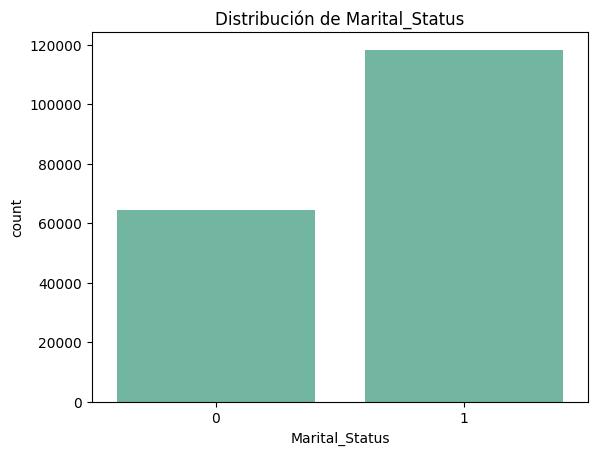

City_Category
A    76169
B    60097
C    46455
Name: count, dtype: int64


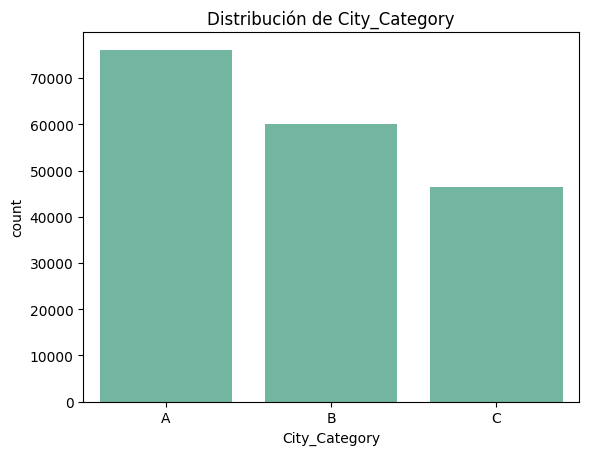

Stay_In_Current_City_Years
1     41481
4     38820
2     38445
5+    38355
3     25620
Name: count, dtype: int64


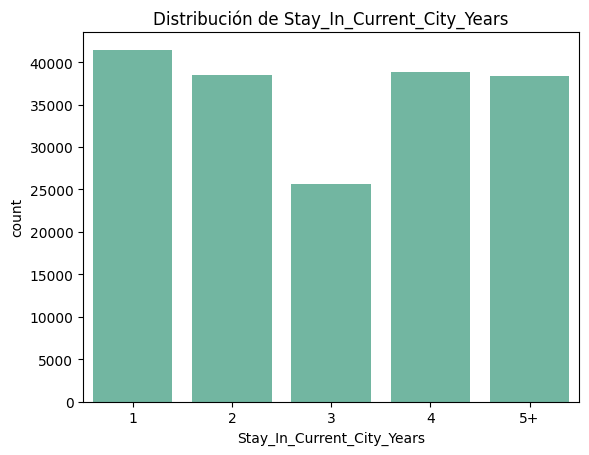

In [203]:
# Análisis univariado: Distribución de variables categóricas
cat_vars = ['Gender', 'Age', 'Marital_Status', 'City_Category', 'Stay_In_Current_City_Years']
for col in cat_vars:
    print(df_inicial[col].value_counts())
    sns.countplot(x=col, data=df_inicial)
    plt.title(f'Distribución de {col}')
    plt.show()


### Análisis de variables categóricas

A continuación se presentan las conclusiones del análisis exploratorio para las variables categóricas:

- **`Gender`**  
  La distribución por género está relativamente balanceada, aunque hay una mayor proporción de hombres (`M`).  
  **Codificación recomendada**: *Label Encoding* (`F = 0`, `M = 1`), dado que es una variable binaria.

- **`Age`**  
  La mayoría de los clientes se encuentra en los rangos de edad media (26-55 años), siendo el grupo de 46-50 el más frecuente.  
  **Codificación recomendada**: *One-Hot Encoding*, ya que la variable es ordinal sin distancias numéricas claras y no queremos asumir relaciones lineales.

- **`Marital_Status`**  
  Representa si el cliente está casado (`1`) o no (`0`).  
  **Codificación recomendada**: Ninguna, ya está en formato binario.

- **`City_Category`**  
  Existen tres categorías (`A`, `B`, `C`) que representan diferentes tipos de ciudades.  
  **Codificación recomendada**: *One-Hot Encoding*, para evitar imponer un orden entre categorías que no lo tienen.

- **`Stay_In_Current_City_Years`**  
  Indica la cantidad de años que un cliente lleva en su ciudad actual.  
  **Codificación recomendada**:
    - *Mapping Encoding* si se desea mantener el orden: `{"1": 1, "2": 2, "3": 3, "4": 4, "5+": 5}`
    - o *One-Hot Encoding* si se prefiere no asumir una relación lineal.


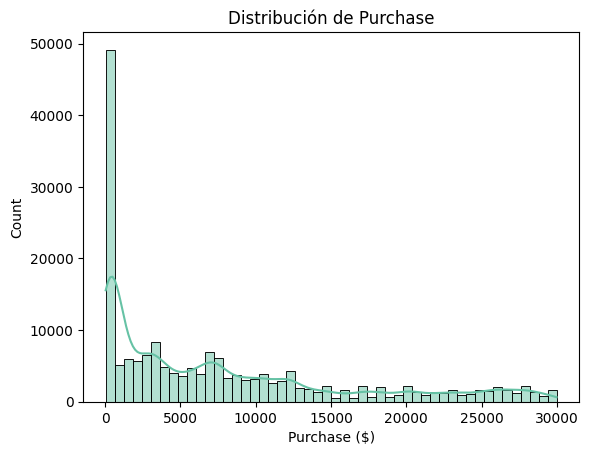

In [204]:
# Análisis univariado: Distribución de variables numéricas
sns.histplot(df_inicial['Purchase'], bins=50, kde=True)
plt.title('Distribución de Purchase')
plt.xlabel('Purchase ($)')
plt.show()

#### Análisis de la variable numérica `Purchase`

La variable `Purchase` representa el monto en dólares gastado por cada cliente en una compra.

**Observaciones:**
- La distribución es fuertemente **asimétrica hacia la derecha** (sesgo positivo), con la mayoría de las compras concentradas en valores bajos.
- Existen muchos valores por debajo de los $3000 y luego una larga cola con compras mayores a $10.000 e incluso algunas cercanas a $30.000.
- Esta variable es fundamental para construir la **variable objetivo**, ya que define a qué segmento pertenece cada cliente según su nivel de gasto.

#### 5. Tratamiento de variables con registros duplicados

array([[<Axes: title={'center': 'Product_Subcategory_2'}>]], dtype=object)

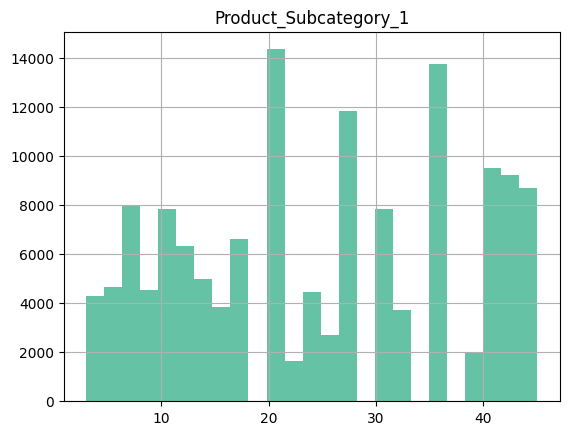

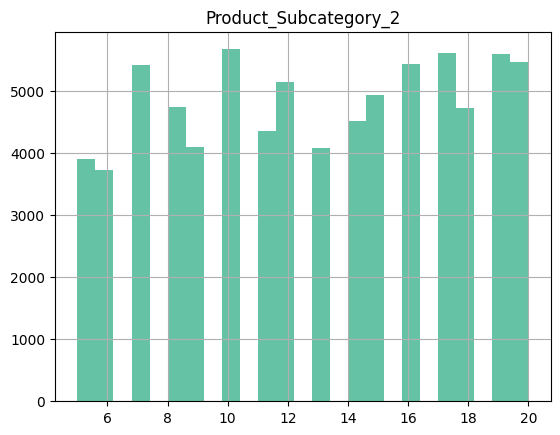

In [205]:
df_inicial.hist('Product_Subcategory_1', bins=25)
df_inicial.hist('Product_Subcategory_2', bins=25)

Aunque es posible que estos registros sean válidos (por ejemplo, un cliente podría haber comprado el mismo producto varias veces al mismo precio), también existe la chance de que correspondan a errores en los datos. Una alternativa sería crear una nueva columna que indique la frecuencia con la que se repite cada combinación. Sin embargo, dado que los duplicados representan una proporción muy pequeña en relación al total del dataset, en este trabajo se decidió eliminarlos (2249 registros) para simplificar el análisis.

In [206]:
df_procesado = df_inicial.copy()
df_procesado = df_procesado.drop_duplicates()
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180472 entries, 0 to 182720
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     180472 non-null  int64   
 1   Product_ID                  180472 non-null  category
 2   Age                         180472 non-null  category
 3   Gender                      180472 non-null  category
 4   Marital_Status              180472 non-null  int64   
 5   City_Category               180472 non-null  category
 6   Stay_In_Current_City_Years  180472 non-null  category
 7   Product_Category            180472 non-null  int64   
 8   Product_Subcategory_1       139144 non-null  float64 
 9   Product_Subcategory_2       76548 non-null   float64 
 10  Purchase                    180472 non-null  int64   
dtypes: category(5), float64(2), int64(4)
memory usage: 10.8 MB


**Product_Subcategory_1**

Esta variable presenta más del 20 % de valores nulos. Inicialmente se decidió eliminarla (junto con Product_Subcategory_2), pero tras evaluar el impacto en las métricas del punto 2c, se reconsideró dicha decisión.

Dado que los valores existentes están expresados como números enteros del 3 al 45, se optó por imputar los nulos con una nueva categoría representada por el valor 0 (equivalente a "Desconocido"). Luego, se convierte la variable a tipo entero para mantener consistencia:

In [207]:
# Análisis de la variable categórica 'Product_Subcategory_1'
df_procesado['Product_Subcategory_1'].unique()

array([45., 27., 28.,  9., nan, 16., 24., 20., 36., 40., 25., 30., 35.,
       12., 22.,  4., 32., 39., 21., 42.,  6., 13., 11., 10., 14., 18.,
        7., 44.,  3., 26.,  5., 33.,  8., 15.])

In [208]:
df_procesado.loc[:,'Product_Subcategory_1'] = df_procesado['Product_Subcategory_1'].fillna(0)
df_procesado.loc[:,'Product_Subcategory_1'] = df_procesado['Product_Subcategory_1'].astype(int)

In [209]:
df_procesado['Product_Subcategory_1'].unique()

array([45., 27., 28.,  9.,  0., 16., 24., 20., 36., 40., 25., 30., 35.,
       12., 22.,  4., 32., 39., 21., 42.,  6., 13., 11., 10., 14., 18.,
        7., 44.,  3., 26.,  5., 33.,  8., 15.])

**Product_Subcategory_2**

Esta variable presenta un porcentaje muy elevado de valores faltantes, incluso mayor al de Product_Subcategory_1. Al observar su distribución, se advierte una gran dispersión en los valores, lo que hace poco adecuado aplicar métodos de imputación simples como la media o la mediana.
Además, el análisis de la matriz de correlación indica que esta variable no muestra relación significativa ni con otras características del dataset ni con la variable objetivo (Purchase).
Dado todo lo anterior, se considera que su aporte es limitado y se decide eliminarla del conjunto de datos.

**Eliminación de identificadores**

Las variables User_ID y Product_ID no brindan información útil para los modelos predictivos. Aunque Product_ID podría contener información relevante, ya existe una columna (Product_Category) que agrupa los productos por categoría, por lo cual se prefiere conservar esta última.
De todos modos, los identificadores se almacenan por separado para ser utilizados más adelante en el punto 2d:

In [210]:
user_ids = df_procesado['User_ID'].values
product_ids = df_procesado['Product_ID'].values

In [211]:
df_procesado = df_procesado.drop(['User_ID', 'Product_ID', 'Product_Subcategory_2'], axis=1)
df_procesado.head(10)

,Age,Gender,Marital_Status,City_Category,Stay_In_Current_City_Years,Product_Category,Product_Subcategory_1,Purchase
0,46-50,F,1,B,1,10,45.0,1810
1,36-45,M,0,A,3,11,27.0,12351
2,36-45,M,1,A,5+,4,28.0,127
3,36-45,M,1,A,1,16,9.0,2214
4,46-50,M,1,A,5+,3,0.0,7142
5,18-25,M,0,A,2,5,16.0,353
6,46-50,F,1,B,5+,17,24.0,117
7,36-45,F,1,B,1,16,0.0,447
8,46-50,F,1,B,5+,11,20.0,7831
9,51-55,F,1,B,4,3,0.0,704


In [212]:
print('Porcentaje de registros restante:', (df_procesado.shape[0]/df_inicial.shape[0])*100, '%')

Porcentaje de registros restante: 98.7691617274424 %


#### 6. Creación de segmento

**Transformación aplicada:**
Se define una **nueva variable categórica** `Segmento` basada en `Purchase`, según los siguientes rangos:

- `Ocasional`: Purchase < 3000  
- `Medio`: 3000 ≤ Purchase < 8000  
- `Alto`: 8000 ≤ Purchase < 18000  
- `Premium`: Purchase ≥ 18000

In [213]:
def categorizar_segmento(valor):
    if valor < 3000:
        return 'Ocasional'
    elif valor < 8000:
        return 'Medio'
    elif valor < 18000:
        return 'Alto'
    else:
        return 'Premium'

In [214]:
df_procesado['Segmento'] = df_procesado['Purchase'].apply(categorizar_segmento)
df_procesado.head(10)

,Age,Gender,Marital_Status,City_Category,Stay_In_Current_City_Years,Product_Category,Product_Subcategory_1,Purchase,Segmento
0,46-50,F,1,B,1,10,45.0,1810,Ocasional
1,36-45,M,0,A,3,11,27.0,12351,Alto
2,36-45,M,1,A,5+,4,28.0,127,Ocasional
3,36-45,M,1,A,1,16,9.0,2214,Ocasional
4,46-50,M,1,A,5+,3,0.0,7142,Medio
5,18-25,M,0,A,2,5,16.0,353,Ocasional
6,46-50,F,1,B,5+,17,24.0,117,Ocasional
7,36-45,F,1,B,1,16,0.0,447,Ocasional
8,46-50,F,1,B,5+,11,20.0,7831,Medio
9,51-55,F,1,B,4,3,0.0,704,Ocasional


#### 7. EDA luego de la creación de segmento

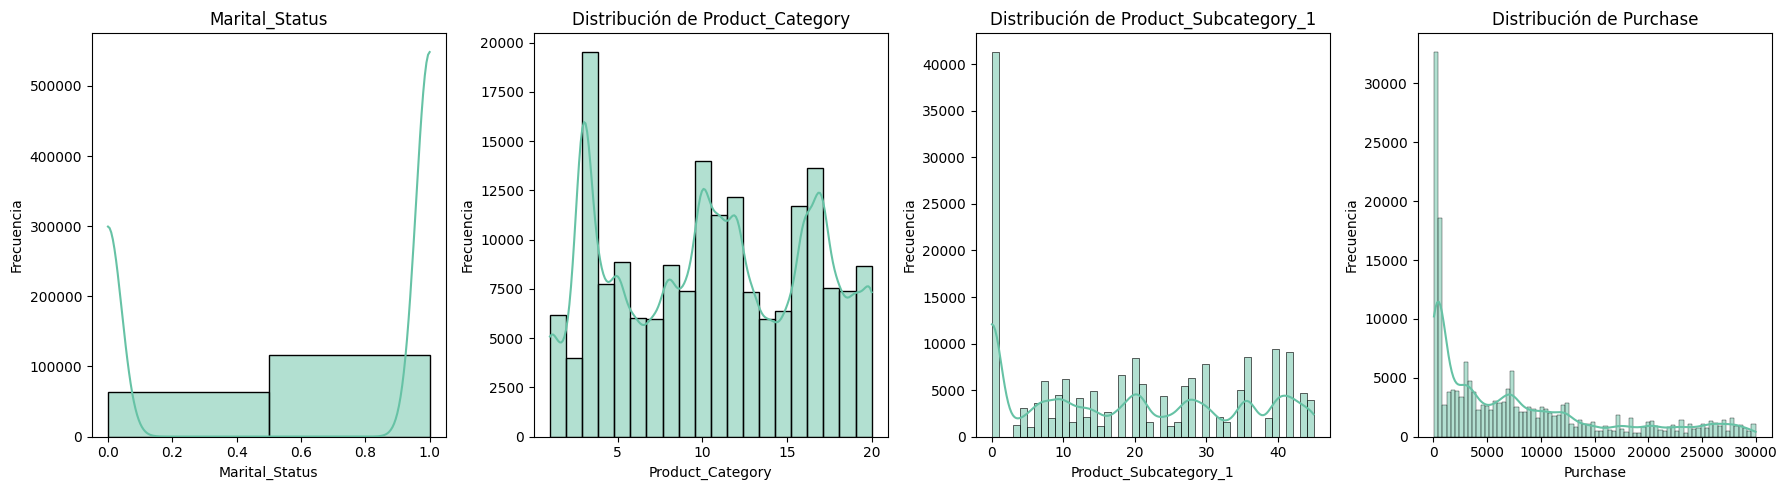

In [215]:
# Variables a graficar y sus títulos personalizados
variables = ['Marital_Status', 'Product_Category', 'Product_Subcategory_1', 'Purchase']
titulos = [
    'Marital_Status',
    'Distribución de Product_Category',
    'Distribución de Product_Subcategory_1',
    'Distribución de Purchase'
]
bins = [2, 20, 'auto', 'auto']

# Crear figura
plt.figure(figsize=(18, 5))

# Loop para crear los subplots
for i, var in enumerate(variables):
    plt.subplot(1, 4, i+1)
    sns.histplot(df_procesado[var], bins=bins[i], kde=True)
    plt.title(titulos[i])
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

##### Análisis de distribuciones de variables numéricas

**Marital_Status**  
La variable `Marital_Status` presenta una distribución binaria clara, con mayor cantidad de registros correspondientes al valor 1 (casados). Esto indica que dentro del conjunto de datos, la mayoría de los usuarios están casados.

**Product_Category**  
La variable `Product_Category` muestra una distribución relativamente uniforme, aunque se observan algunos picos específicos en ciertas categorías (por ejemplo, categorías 4, 8 y 10). Esto sugiere que algunos tipos de productos tienen mayor demanda que otros.

**Product_Subcategory_1**  
La distribución de `Product_Subcategory_1` es más dispersa, con una notable acumulación en la categoría 0 (correspondiente a los valores imputados como "Unknown"). El resto de las subcategorías presentan una distribución bastante heterogénea, lo cual indica una alta variedad de productos dentro del dataset.

**Purchase**  
La variable `Purchase` presenta una distribución sesgada a la derecha (positively skewed), con una gran cantidad de compras de bajo monto y algunas compras de valores muy altos. Esta asimetría puede requerir normalización o transformación logarítmica si se usan modelos sensibles a la escala.

In [216]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180472 entries, 0 to 182720
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Age                         180472 non-null  category
 1   Gender                      180472 non-null  category
 2   Marital_Status              180472 non-null  int64   
 3   City_Category               180472 non-null  category
 4   Stay_In_Current_City_Years  180472 non-null  category
 5   Product_Category            180472 non-null  int64   
 6   Product_Subcategory_1       180472 non-null  float64 
 7   Purchase                    180472 non-null  int64   
 8   Segmento                    180472 non-null  object  
dtypes: category(4), float64(1), int64(3), object(1)
memory usage: 9.0+ MB


In [217]:
# Variables categóricas
df_procesado.describe(include='category')

,Age,Gender,City_Category,Stay_In_Current_City_Years
count,180472,180472,180472,180472
unique,7,2,3,5
top,46-50,M,A,1
freq,37622,97386,75142,41080


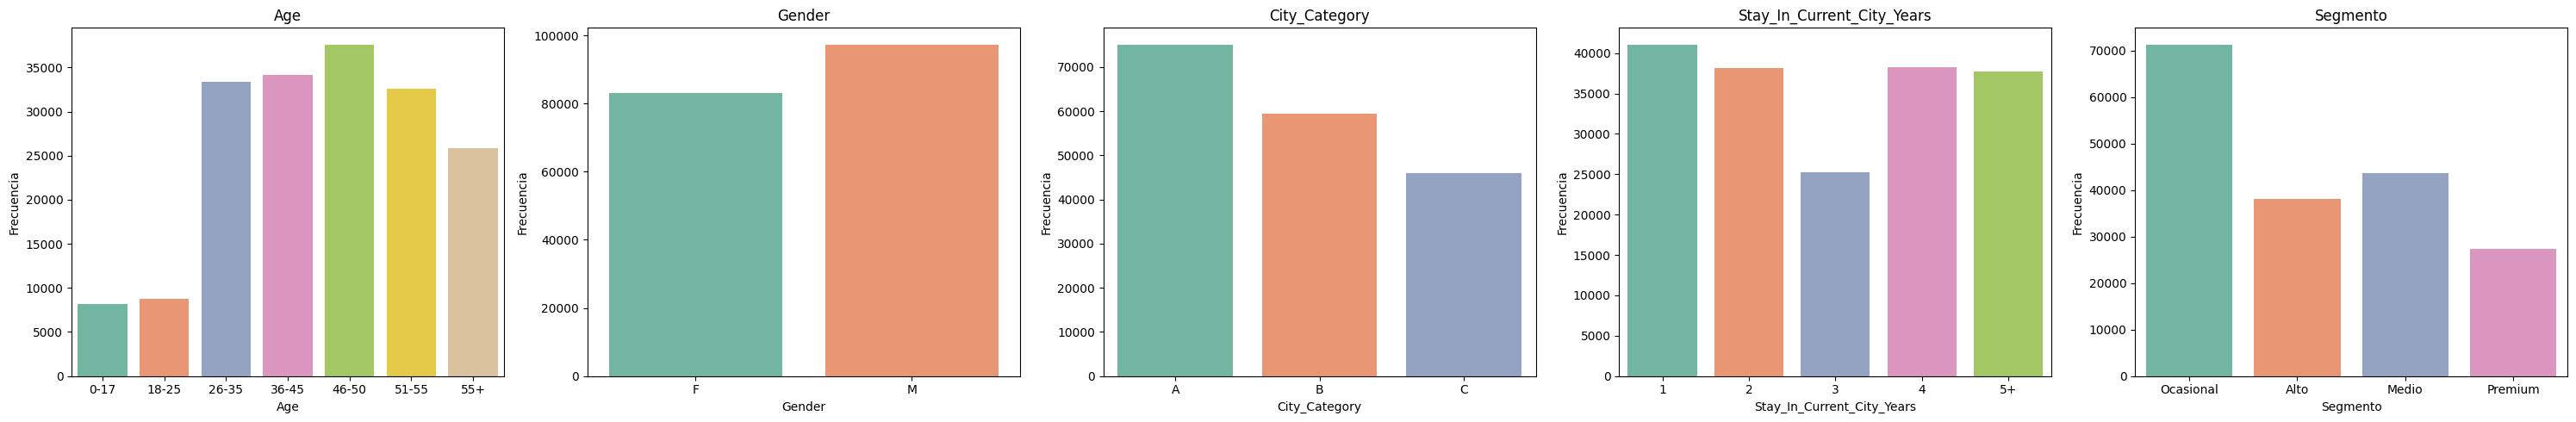

In [218]:
# Lista de variables categóricas a graficar
cat_vars = ['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years', 'Segmento']

# Crear los subplots
fig, ax = plt.subplots(1, len(cat_vars), figsize=(6 * len(cat_vars), 5))

# Loop para generar cada gráfico
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df_procesado, ax=ax[i], hue=var)
    ax[i].set_title(var)
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

##### Análisis de variables categóricas

- **Age**  
  La mayoría de los compradores se concentra entre los **26 y 50 años**, siendo las franjas "46-50" y "36-45" las más representadas. Los grupos extremos ("0-17" y "55+") tienen una participación menor, lo cual puede estar relacionado con el poder adquisitivo o hábitos de consumo.

- **Gender**  
  Se observa una mayor proporción de compradores **masculinos (M)** frente a femeninos (F). Esta diferencia podría ser relevante a la hora de segmentar campañas de marketing.

- **City_Category**  
  La **categoría de ciudad A** presenta la mayor cantidad de compradores, seguida de B y luego C. Esto sugiere que los usuarios de zonas más urbanizadas o desarrolladas están más activos en la plataforma.

- **Stay_In_Current_City_Years**  
  La mayoría de los usuarios lleva **1 o 2 años** viviendo en su ciudad actual, pero también hay una proporción importante con **5 o más años**, lo que indica una mezcla de perfiles de movilidad. El valor más bajo aparece en quienes llevan **3 años**, lo que podría no ser significativo pero merece seguimiento.

- **Segmento**  
  La mayoría de los usuarios se agrupan en el segmento **"Ocasional"**, seguido de "Medio" y "Alto". El segmento **"Premium"** tiene la menor representación, lo cual podría reflejar que solo una fracción del total realiza compras de alto valor. Esta segmentación es útil para diseñar estrategias diferenciadas.

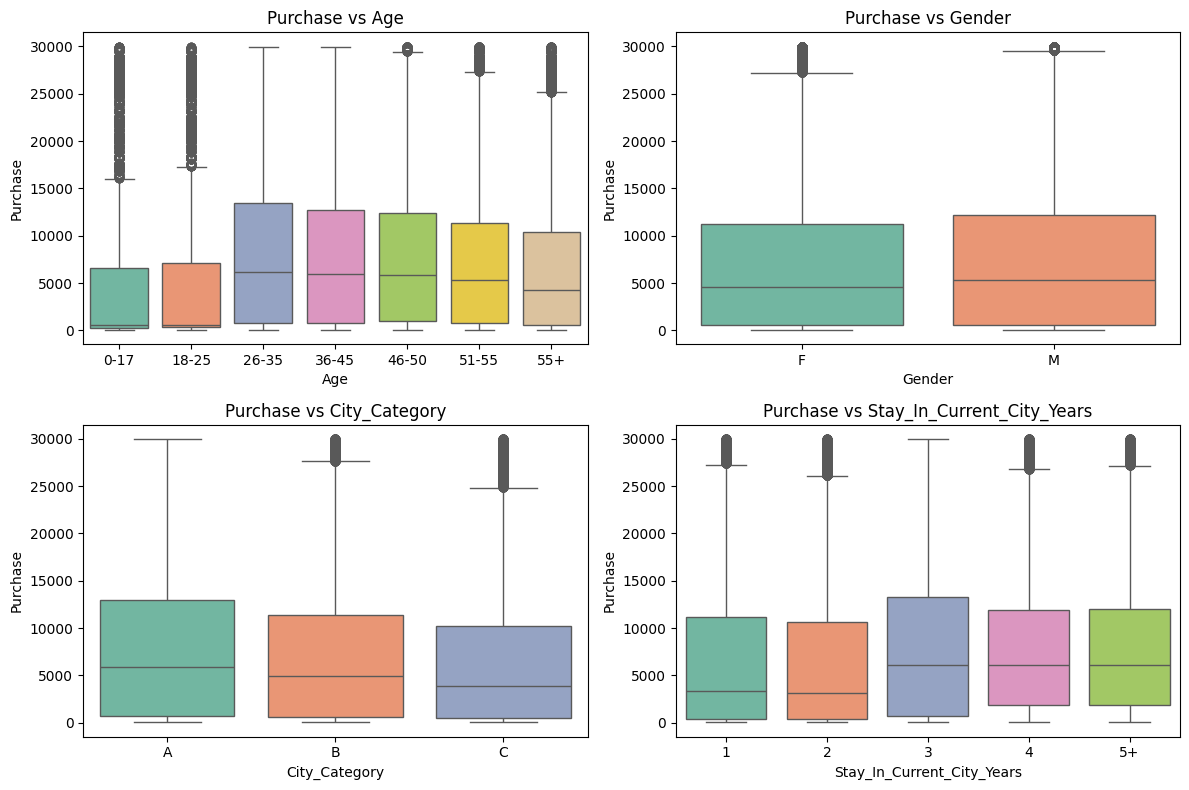

In [221]:
# Lista de variables categóricas para graficar
categorical_vars = ['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years']

# Crear figura
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Graficar cada boxplot en su subplot correspondiente
for i, var in enumerate(categorical_vars):
    row = i // 2
    col = i % 2
    sns.boxplot(data=df_procesado, y='Purchase', x=var, hue=var, ax=ax[row, col])
    ax[row, col].set_xlabel(var)
    ax[row, col].set_ylabel('Purchase')
    ax[row, col].set_title(f'Purchase vs {var}')

plt.tight_layout()
plt.show()

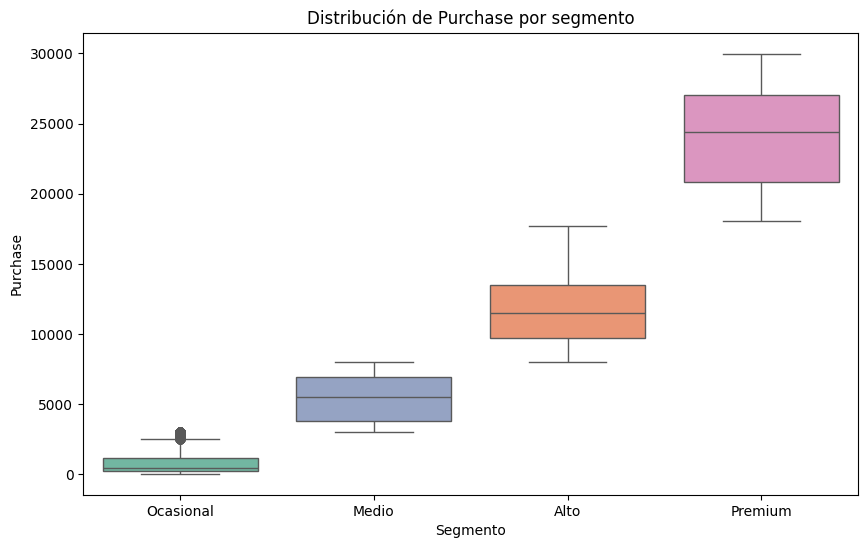

In [222]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segmento', y='Purchase', hue='Segmento', data=df_procesado, order=["Ocasional", "Medio", "Alto", "Premium"])
plt.title("Distribución de Purchase por segmento")
plt.ylabel("Purchase")
plt.xlabel("Segmento")
plt.show()

##### Análisis de Boxplots de `Purchase` por Variables Categóricas

###### `Purchase` vs `Age`
- Las categorías de edad entre **26-50 años** presentan medianas de compra más elevadas que los grupos extremos (0-17, 55+).
- El grupo **36-45** muestra un rango intercuartílico más amplio, lo que indica una mayor variabilidad en el gasto.
- Todas las franjas etarias presentan **outliers**, lo que sugiere la existencia de compras excepcionales.

###### `Purchase` vs `Gender`
- **Hombres (M)** tienen una mediana de compra **ligeramente superior** a las mujeres (F).
- Ambas distribuciones son similares, aunque los hombres presentan una mayor dispersión hacia valores altos.

###### `Purchase` vs `City_Category`
- Los usuarios de la categoría **A** presentan valores de compra más altos en promedio.
- Las categorías **B** y **C** tienen distribuciones más similares y con medianas menores.
- Esto sugiere que los usuarios de **ciudades más grandes o desarrolladas** tienden a gastar más.

###### `Purchase` vs `Stay_In_Current_City_Years`
- La cantidad de años viviendo en la ciudad **no parece influir fuertemente** en el valor de compra.
- Aunque quienes llevan **3 años** en la ciudad muestran una leve tendencia a un mayor gasto.

---

##### Distribución de `Purchase` por Segmento

###### `Segmento` vs `Purchase`
- Se observa una **relación clara y creciente** entre el segmento asignado y el valor de compra:
  - **Ocasional → Medio → Alto → Premium**
- El segmento **Premium** presenta la mayor mediana de compra y menor dispersión relativa, lo cual **valida la segmentación utilizada**.
- El segmento **Ocasional** muestra mayor variabilidad y presencia de outliers, lo que puede implicar comportamiento esporádico y menos predecible.

---

#### 8. Codificación de variables

A continuación, se procede a eliminar la variable `Purchase` del conjunto de datos y a codificar las variables categóricas según el tipo de información que representan. Se aplican diferentes técnicas de codificación de acuerdo con la naturaleza de cada variable:

- **`Age`**, **`Stay_In_Current_City_Years`**, **`Segmento`**: se utiliza **OrdinalEncoder**, ya que estas variables presentan un orden lógico entre sus categorías.
- **`Gender`**, **`City_Category`**: se aplica **One Hot Encoding**, debido a que las categorías no poseen un orden jerárquico.
- **`Marital_Status`**, **`Product_Category`**, **`Product_Subcategory_1`**: ya se encuentran en formato numérico, por lo que no requieren transformación adicional.

In [223]:
# Codificación de variables categóricas
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

df_procesado = df_procesado.drop(columns=['Purchase'])
df_procesado.head()

,Age,Gender,Marital_Status,City_Category,Stay_In_Current_City_Years,Product_Category,Product_Subcategory_1,Segmento
0,46-50,F,1,B,1,10,45.0,Ocasional
1,36-45,M,0,A,3,11,27.0,Alto
2,36-45,M,1,A,5+,4,28.0,Ocasional
3,36-45,M,1,A,1,16,9.0,Ocasional
4,46-50,M,1,A,5+,3,0.0,Medio


In [224]:
# Definir órdenes para columnas ordinales
ordenes = {
    'Age': ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
    'Stay_In_Current_City_Years': ['1', '2', '3', '4', '5+'],
    'Segmento': ['Ocasional', 'Medio', 'Alto', 'Premium']
}

# Aplicar OrdinalEncoder usando la definición anterior
ordinal_cols = list(ordenes.keys())
ordinal_encoder = OrdinalEncoder(categories=[ordenes[col] for col in ordinal_cols])
df_procesado[ordinal_cols] = ordinal_encoder.fit_transform(df_procesado[ordinal_cols]).astype(int)

# Aplicar One Hot Encoding a columnas restantes
df_procesado = pd.get_dummies(df_procesado, columns=['Gender', 'City_Category'], drop_first=True).astype(int)

In [225]:
df_procesado.head()

,Age,Marital_Status,Stay_In_Current_City_Years,Product_Category,Product_Subcategory_1,Segmento,Gender_M,City_Category_B,City_Category_C
0,4,1,0,10,45,0,0,1,0
1,3,0,2,11,27,2,1,0,0
2,3,1,4,4,28,0,1,0,0
3,3,1,0,16,9,0,1,0,0
4,4,1,4,3,0,1,1,0,0


In [226]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180472 entries, 0 to 182720
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Age                         180472 non-null  int64
 1   Marital_Status              180472 non-null  int64
 2   Stay_In_Current_City_Years  180472 non-null  int64
 3   Product_Category            180472 non-null  int64
 4   Product_Subcategory_1       180472 non-null  int64
 5   Segmento                    180472 non-null  int64
 6   Gender_M                    180472 non-null  int64
 7   City_Category_B             180472 non-null  int64
 8   City_Category_C             180472 non-null  int64
dtypes: int64(9)
memory usage: 13.8 MB


#### 9. Separar dataset en train y test

In [227]:
# Dividir el DataFrame en características (X) y etiquetas (y)
X = df_procesado.drop(columns=['Segmento'])
y = df_procesado['Segmento']

In [228]:
# Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### 2b) Modelo de deep leaning sin embeddings (1.5 puntos)
Entrenar un modelo de deep learning usando Pytorch que no utilice embeddings, **descartando el `product_id` y `user_id`**. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y validation. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 77% de accuracy y f1 score para el set de validation.

### 2c) Modelo de deep leaning con embeddings (2 puntos)
Entrenar un modelo de deep learning usando Pytorch que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones por época de la función de costo y de métricas como el accuracy y el f1 score para train y test. Mostrar una matriz de confusión absoluta y otra normalizada por fila. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Justificar la cantidad de dimensiones usada para los embeddings. **Comparar contra el modelo sin embeddings** y explicar el porqué de los resultados.

Pueden usarse herramientas de regularización y prueba de hiperpametros para conseguir mejores resultados.

Un resultado aceptable sería al menos un 90% de accuracy y f1 score para el set de validation.

### 2d) Encontrar usuarios similares (1 punto)
Para el modelo del punto 2c) implementar una función que reciba un ID de usuario y sugiera **n** cantidad de usuarios que tuvieron un comportamiento de compras similar. También se debe mostrar el grado o porcentaje de similitud de cada usuario que retorne la función.